In [1]:
import numpy as np 
import scipy as sp 
import matplotlib.pyplot as plt
import pandas as pd
from osc_toolkit import oscillation, delayed_oscillation
from models import *
from functools import partial

In [2]:
files = ['Data_sets/1_expB_osc_NatChem_MH.csv',
         'Data_sets/3b_expB_osc_NatChem_MH.csv',
         'Data_sets/4_expB_osc_NatChem_MH.csv']

df_list = [pd.read_csv(file) for file in files]

exp_data = pd.concat(df_list, axis=1)

exp_data.columns = ['t1', 'c1', 't3b', 'c3b', 't4', 'c4']

cut_off, CMC_3b = 112, 0.52
tau = 0.25
C_A2tol = exp_data.loc[0, 'c1'] + exp_data.loc[0, 'c4'] / 2

exp_data = exp_data.head(cut_off)
exp_data[['c1', 'c4']] /= C_A2tol
exp_data['c3b'] /= CMC_3b

for s in ['t1', 't3b', 't4']:
    exp_data = exp_data.drop_duplicates(subset=s)
    exp_data[s] /= tau

df_MHNatChem = exp_data.clip(lower=0)
df_MHNatChem.loc[0, 't3b'] = 0
df_MHNatChem.loc[0, 't4'] = 0

# Full model with H2O2 consumption term

In [11]:
params = np.array([8.5, 0.7, 0.5, 6.2, 30.0])
consts = np.array([0.17, 2])
delay = np.array([0.25, 0.6])
init_cond = np.array([0.05, 0, 0.1])
delayed_model_stirr = delayed_oscillation(delayed_full_model_consumeO, delay, params, consts, init_cond, calc_all_delayed_full_model_consumeO)
delayed_model_stirr.add_exp_data(df_MHNatChem)

The species are ['A2', 'S_sum', 'A', 'O']. Please check if the data is in the same order and correct format (time, concentration).


/Users/zhihengzhang/anaconda3/lib/python3.11/site-packages/jitcdde/_jitcdde.py:324: UserWarning: The spline already contains points. This will remove them. Be sure that you really want this.
  self.past.constant(state,time)


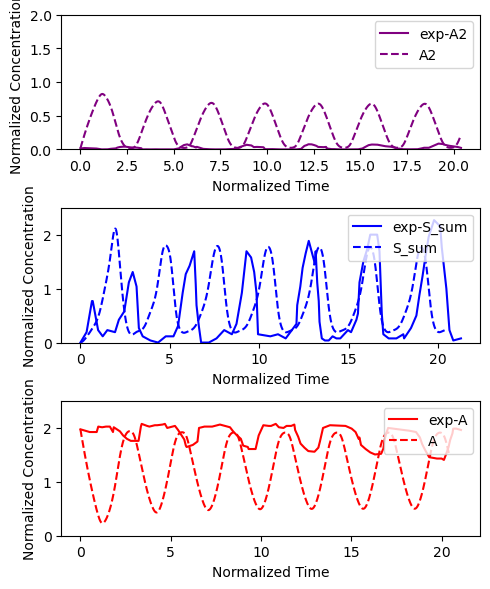

In [13]:
fig, axes = delayed_model_stirr.plot(t=6, exp=True, nvars=3)
axes[0].set_ylim(0, 2)
axes[1].set_ylim(0, 2.5)
axes[2].set_ylim(0, 2.5)
fig.tight_layout()